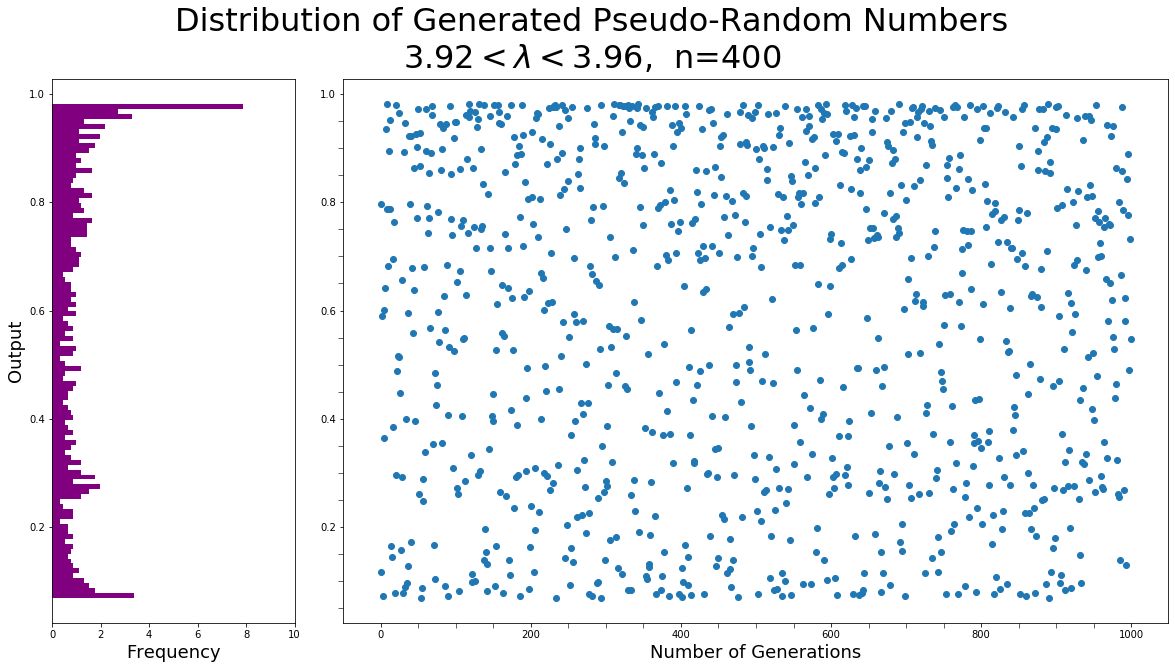

In [2]:
from ipywidgets import interact, widgets, Label, Layout
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = 20,10

class model(object):
    def __init__(self):
        self.xmin = 3.92
        self.xmax = 3.93
        self.k_old = 0
        
    def mapLambda(self, seed):
        bins = 10000.
        x = (seed % bins)
        if x > 1:
            x /= bins
        x = x * (self.xmax - self.xmin) + self.xmin
        return x

    def compute(self, numpts, seed=0.):
        self.ypts = np.arange(numpts) * 0.
        x = self.mapLambda(seed)
        for i in range(numpts):
            y = 0.01
            for iterations in range(400):
                y = x * y * (1 - y)
            self.ypts[i] = y
#             print('y:', self.ypts[i])
            x = self.mapLambda(y)
#             print(x)

        grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
        fig, ax = plt.subplots()
        plt.suptitle('Distribution of Generated Pseudo-Random Numbers\n$3.92<\lambda<3.96$,  n=400', fontsize=32)
        plt.subplot(grid[:, 1:])
        plt.xlabel('Number of Generations', fontsize=18)
        plt.minorticks_on()
        plt.tick_params(which='minor', length=5)
        plt.plot(self.ypts, marker='o', linestyle='None')   
        
        plt.subplot(grid[:, 0])
        plt.xlabel('Frequency', fontsize=18)
        plt.ylabel('Output', fontsize=18)
        plt.hist(self.ypts, 100, color='purple', orientation='horizontal', density=True)
        plt.xlim(0,10)
        a.fig = fig
    
    
a = model()
a.compute(1000, seed=285)

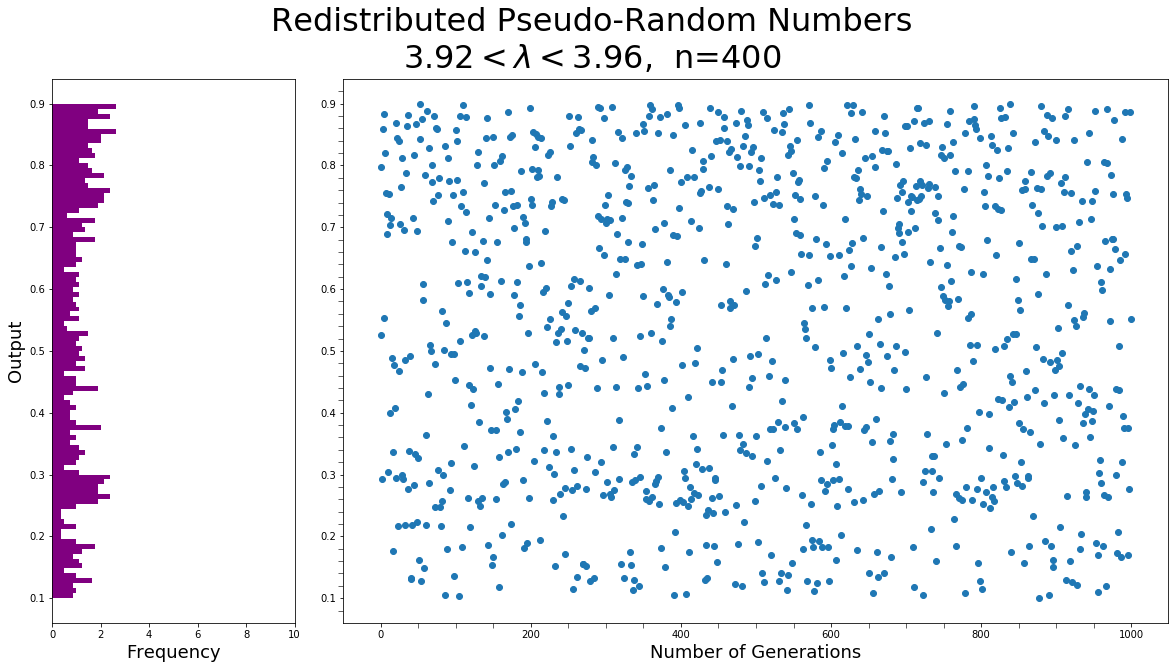

In [3]:
from ipywidgets import interact, widgets, Label, Layout
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = 20,10

class model(object):
    def __init__(self):
        self.xmin = 3.92
        self.xmax = 3.93
        self.ymin = 0.1
        self.ymax = 0.9
        
    def mapLambda(self, seed):
        bins = 10000.
        x = (seed % bins)
        if x > 1:
            x /= bins
        x = x * (self.xmax - self.xmin) + self.xmin
        return x
    
    def rescale(self, y):
        y = (y - self.ymin) / self.ymax
        return y

    def compute(self, numpts, seed=0.):
        self.ypts = np.arange(numpts) * 0.
        x = self.mapLambda(seed)
        i = 0
        while i < numpts:
            y = 0.01
            for iterations in range(400):
                y = x * y * (1 - y)
            if y > self.ymin and y < self.ymax:
                self.ypts[i] = y
                i += 1
            y = self.rescale(y)
            x = self.mapLambda(y)

        grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
        fig, ax = plt.subplots()
        plt.suptitle('Redistributed Pseudo-Random Numbers\n$3.92<\lambda<3.96$,  n=400', fontsize=32)
        plt.subplot(grid[:, 1:])
        plt.xlabel('Number of Generations', fontsize=18)
        plt.minorticks_on()
        plt.tick_params(which='minor', length=5)
        plt.plot(self.ypts, marker='o', linestyle='None')   
        
        plt.subplot(grid[:, 0])
        plt.xlabel('Frequency', fontsize=18)
        plt.ylabel('Output', fontsize=18)
        plt.hist(self.ypts, 100, color='purple', orientation='horizontal', density=True)
        plt.xlim(0,10)
        a.fig = fig
    
    
a = model()
a.compute(1000, seed=285)

In [12]:
a = np.array([[14, 29, 30, 27, 28, 31, 28, 13],[13.4, 18.3, 30.0, 38.3, 38.3, 30.0, 18.3, 13.4]])
d = 5
chi2 = 1 / d * sum((a[0] - a[1])**2 / a[1])
print(chi2)

3.5147739920438035
